In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r'forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# EDA

In [3]:
df.drop(columns=["month", "day"],inplace=True)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

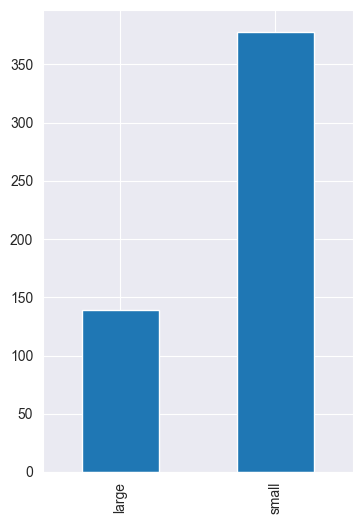

In [5]:
sns.set_style(style='darkgrid')
plt.rcParams['figure.figsize']= (4,6)
df['size_category'].value_counts().sort_values().plot(kind='bar')
plt.show()

In [6]:
df.shape

(517, 29)

In [7]:
df.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [9]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
np.round(df.corr(),3)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000,0.383,0.331,0.532,0.432,-0.301,-0.028,0.057,0.040,0.019,...,-0.137,-0.282,-0.455,0.032,-0.041,-0.074,-0.037,-0.089,-0.006,0.077
DMC,0.383,1.000,0.682,0.305,0.470,0.074,-0.105,0.075,0.073,-0.012,...,-0.176,-0.318,-0.106,-0.002,-0.050,-0.407,-0.082,-0.074,-0.188,0.111
DC,0.331,0.682,1.000,0.229,0.496,-0.039,-0.203,0.036,0.049,-0.004,...,-0.106,-0.399,-0.115,-0.101,-0.186,-0.650,-0.114,-0.078,0.093,0.532
ISI,0.532,0.305,0.229,1.000,0.394,-0.133,0.107,0.068,0.008,0.047,...,-0.162,-0.250,-0.104,0.021,0.112,-0.144,-0.060,-0.077,-0.071,-0.069
temp,0.432,0.470,0.496,0.394,1.000,-0.527,-0.227,0.069,0.098,-0.072,...,-0.330,-0.320,-0.147,0.143,0.051,-0.342,-0.046,-0.054,-0.054,0.088
RH,-0.301,0.074,-0.039,-0.133,-0.527,1.000,0.069,0.100,-0.076,0.065,...,-0.048,0.140,0.171,0.013,0.009,-0.090,0.087,-0.036,-0.072,-0.063
wind,-0.028,-0.105,-0.203,0.107,-0.227,0.069,1.000,0.061,0.012,0.118,...,0.270,-0.029,-0.070,-0.041,0.012,0.181,0.015,0.012,-0.054,-0.181
rain,0.057,0.075,0.036,0.068,0.069,0.100,0.061,1.000,-0.007,-0.004,...,-0.010,-0.015,-0.005,-0.013,-0.014,-0.021,-0.005,-0.003,-0.013,-0.052
area,0.040,0.073,0.049,0.008,0.098,-0.076,0.012,-0.007,1.000,-0.053,...,0.001,-0.021,-0.013,0.006,-0.020,-0.046,0.006,-0.009,-0.017,0.057
dayfri,0.019,-0.012,-0.004,0.047,-0.072,0.065,0.118,-0.004,-0.053,1.000,...,-0.019,0.046,-0.028,-0.049,0.006,0.036,0.056,-0.020,-0.046,0.108


<AxesSubplot: >

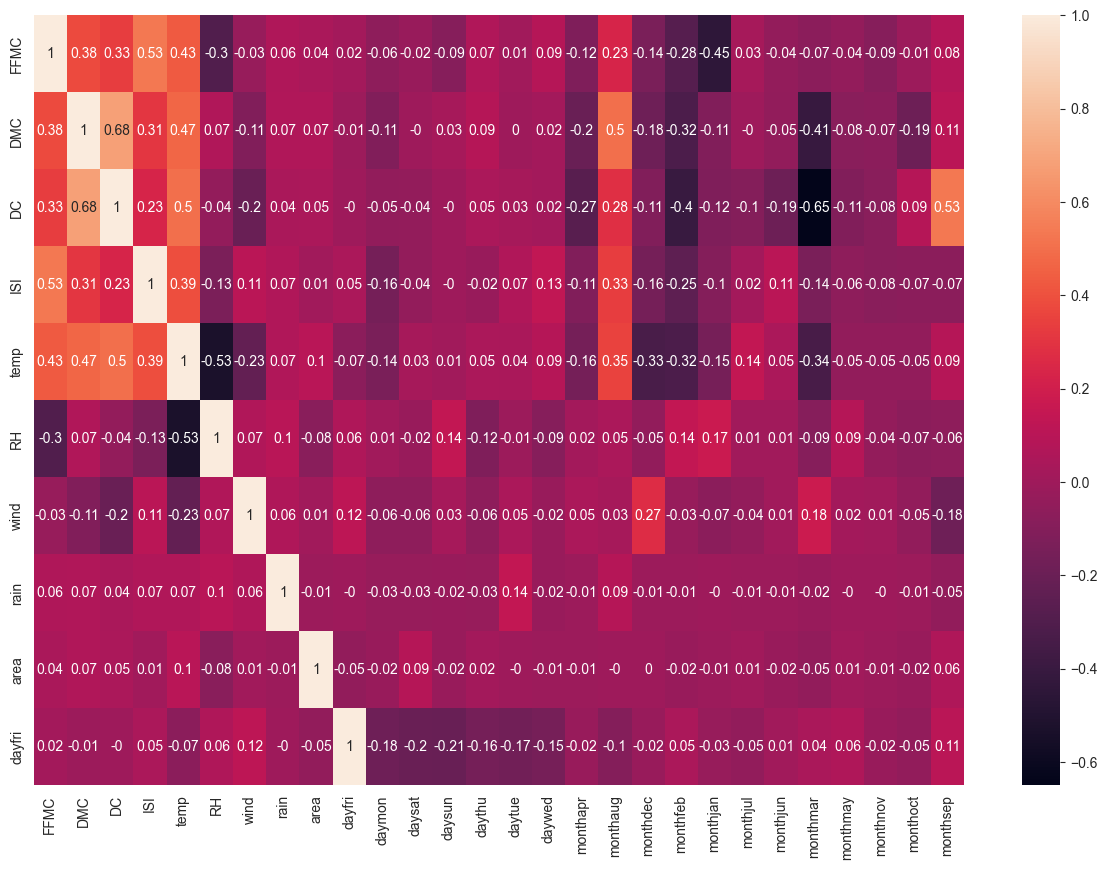

In [11]:
plt.rcParams['figure.figsize']= (15,10)
sns.heatmap(np.round(df.corr(),2)[0:10], annot=True)

In [12]:
# converting target column into 0 and 1 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['size_category'] = le.fit_transform(df['size_category'])

In [13]:
df['size_category'].value_counts()

1    378
0    139
Name: size_category, dtype: int64

In [14]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
# spliting training and test data

from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y, test_size=0.25, random_state=1)

# Neural Network ANN

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [28]:
# Initiate ANN

ann = Sequential()

# Add hidden layers

ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=5, activation='relu'))

# Add Output layers

ann.add(Dense(units=1, activation='sigmoid'))

# Add connections

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train model

ann.fit(xtrain,ytrain,batch_size=30, epochs=250)

Epoch 1/250
13/13 [==============================] - 2s 4ms/step - loss: 42.4993 - accuracy: 0.2739
Epoch 2/250
13/13 [==============================] - 0s 6ms/step - loss: 34.4333 - accuracy: 0.2739
Epoch 3/250
13/13 [==============================] - 0s 8ms/step - loss: 27.2599 - accuracy: 0.3101
Epoch 4/250
13/13 [==============================] - 0s 4ms/step - loss: 21.4174 - accuracy: 0.3488
Epoch 5/250
13/13 [==============================] - 0s 4ms/step - loss: 16.8645 - accuracy: 0.3669
Epoch 6/250
13/13 [==============================] - 0s 3ms/step - loss: 13.1812 - accuracy: 0.3721
Epoch 7/250
13/13 [==============================] - 0s 6ms/step - loss: 10.1925 - accuracy: 0.3798
Epoch 8/250
13/13 [==============================] - 0s 4ms/step - loss: 6.0765 - accuracy: 0.3798
Epoch 9/250
13/13 [==============================] - 0s 4ms/step - loss: 1.6237 - accuracy: 0.6047
Epoch 10/250
13/13 [==============================] - 0s 5ms/step - loss: 1.0455 - accuracy: 0.7132
Ep

13/13 [==============================] - 0s 3ms/step - loss: 0.2768 - accuracy: 0.8837
Epoch 83/250
13/13 [==============================] - 0s 5ms/step - loss: 0.2707 - accuracy: 0.8889
Epoch 84/250
13/13 [==============================] - 0s 4ms/step - loss: 0.2631 - accuracy: 0.8941
Epoch 85/250
13/13 [==============================] - 0s 4ms/step - loss: 0.2545 - accuracy: 0.8966
Epoch 86/250
13/13 [==============================] - 0s 4ms/step - loss: 0.2492 - accuracy: 0.8992
Epoch 87/250
13/13 [==============================] - 0s 3ms/step - loss: 0.2414 - accuracy: 0.9096
Epoch 88/250
13/13 [==============================] - 0s 3ms/step - loss: 0.2340 - accuracy: 0.9096
Epoch 89/250
13/13 [==============================] - 0s 3ms/step - loss: 0.2287 - accuracy: 0.9096
Epoch 90/250
13/13 [==============================] - 0s 3ms/step - loss: 0.2168 - accuracy: 0.9147
Epoch 91/250
13/13 [==============================] - 0s 3ms/step - loss: 0.2149 - accuracy: 0.9225
Epoch 92/250


13/13 [==============================] - 0s 5ms/step - loss: 0.0206 - accuracy: 0.9948
Epoch 164/250
13/13 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 0.9922
Epoch 165/250
13/13 [==============================] - 0s 4ms/step - loss: 0.0287 - accuracy: 0.9897
Epoch 166/250
13/13 [==============================] - 0s 4ms/step - loss: 0.0221 - accuracy: 0.9948
Epoch 167/250
13/13 [==============================] - 0s 5ms/step - loss: 0.0254 - accuracy: 0.9948
Epoch 168/250
13/13 [==============================] - 0s 4ms/step - loss: 0.0218 - accuracy: 0.9922
Epoch 169/250
13/13 [==============================] - 0s 4ms/step - loss: 0.0422 - accuracy: 0.9819
Epoch 170/250
13/13 [==============================] - 0s 5ms/step - loss: 0.0211 - accuracy: 0.9974
Epoch 171/250
13/13 [==============================] - 0s 5ms/step - loss: 0.0194 - accuracy: 0.9948
Epoch 172/250
13/13 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.9922
Epoc

13/13 [==============================] - 0s 5ms/step - loss: 0.0236 - accuracy: 0.9897
Epoch 245/250
13/13 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 246/250
13/13 [==============================] - 0s 4ms/step - loss: 0.0182 - accuracy: 0.9948
Epoch 247/250
13/13 [==============================] - 0s 4ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 248/250
13/13 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 249/250
13/13 [==============================] - 0s 4ms/step - loss: 0.0152 - accuracy: 0.9948
Epoch 250/250
13/13 [==============================] - 0s 4ms/step - loss: 0.0258 - accuracy: 0.9897


In [29]:
ypred = ann.predict(xtest)

5/5 [==============================] - 0s 3ms/step


In [30]:
ypred = ypred>0.5
ypred

array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [

In [31]:
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        97

    accuracy                           0.99       130
   macro avg       0.99      0.99      0.99       130
weighted avg       0.99      0.99      0.99       130



In [32]:
_, accuracy = ann.evaluate(xtrain,ytrain)

13/13 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9871


In [34]:
# Initiate ANN

ann = Sequential()

# Add hidden layers

ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=5, activation='relu'))

# Add Output layers

ann.add(Dense(units=1, activation='sigmoid'))

# Add connections

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train model

ann.fit(xtrain,ytrain,batch_size=30,validation_data=(xtest,ytest), epochs=250)

Epoch 1/250
13/13 [==============================] - 3s 45ms/step - loss: 8.8674 - accuracy: 0.6641 - val_loss: 7.6039 - val_accuracy: 0.6538
Epoch 2/250
13/13 [==============================] - 0s 8ms/step - loss: 5.1228 - accuracy: 0.6434 - val_loss: 3.9750 - val_accuracy: 0.5231
Epoch 3/250
13/13 [==============================] - 0s 15ms/step - loss: 3.1954 - accuracy: 0.5245 - val_loss: 3.4264 - val_accuracy: 0.5077
Epoch 4/250
13/13 [==============================] - 0s 12ms/step - loss: 2.6434 - accuracy: 0.5736 - val_loss: 3.0445 - val_accuracy: 0.5308
Epoch 5/250
13/13 [==============================] - 0s 8ms/step - loss: 2.2699 - accuracy: 0.5607 - val_loss: 2.7385 - val_accuracy: 0.5154
Epoch 6/250
13/13 [==============================] - 0s 8ms/step - loss: 2.0355 - accuracy: 0.5659 - val_loss: 2.5108 - val_accuracy: 0.5385
Epoch 7/250
13/13 [==============================] - 0s 9ms/step - loss: 1.8500 - accuracy: 0.5762 - val_loss: 2.3216 - val_accuracy: 0.5154
Epoch 8/25

Epoch 59/250
13/13 [==============================] - 0s 9ms/step - loss: 0.2942 - accuracy: 0.8863 - val_loss: 0.3877 - val_accuracy: 0.8692
Epoch 60/250
13/13 [==============================] - 0s 9ms/step - loss: 0.3001 - accuracy: 0.8811 - val_loss: 0.4108 - val_accuracy: 0.8692
Epoch 61/250
13/13 [==============================] - 0s 9ms/step - loss: 0.2974 - accuracy: 0.8889 - val_loss: 0.3733 - val_accuracy: 0.8846
Epoch 62/250
13/13 [==============================] - 0s 10ms/step - loss: 0.3057 - accuracy: 0.8708 - val_loss: 0.3790 - val_accuracy: 0.8846
Epoch 63/250
13/13 [==============================] - 0s 9ms/step - loss: 0.2767 - accuracy: 0.8863 - val_loss: 0.3699 - val_accuracy: 0.8846
Epoch 64/250
13/13 [==============================] - 0s 7ms/step - loss: 0.2672 - accuracy: 0.8837 - val_loss: 0.3542 - val_accuracy: 0.8846
Epoch 65/250
13/13 [==============================] - 0s 8ms/step - loss: 0.2613 - accuracy: 0.8941 - val_loss: 0.3320 - val_accuracy: 0.8846
Epoch

13/13 [==============================] - 0s 6ms/step - loss: 0.1107 - accuracy: 0.9690 - val_loss: 0.1766 - val_accuracy: 0.9385
Epoch 117/250
13/13 [==============================] - 0s 6ms/step - loss: 0.1032 - accuracy: 0.9742 - val_loss: 0.1807 - val_accuracy: 0.9231
Epoch 118/250
13/13 [==============================] - 0s 6ms/step - loss: 0.1044 - accuracy: 0.9716 - val_loss: 0.1775 - val_accuracy: 0.9231
Epoch 119/250
13/13 [==============================] - 0s 6ms/step - loss: 0.1039 - accuracy: 0.9638 - val_loss: 0.1732 - val_accuracy: 0.9538
Epoch 120/250
13/13 [==============================] - 0s 5ms/step - loss: 0.1102 - accuracy: 0.9767 - val_loss: 0.1769 - val_accuracy: 0.9308
Epoch 121/250
13/13 [==============================] - 0s 5ms/step - loss: 0.0996 - accuracy: 0.9716 - val_loss: 0.1737 - val_accuracy: 0.9385
Epoch 122/250
13/13 [==============================] - 0s 5ms/step - loss: 0.1007 - accuracy: 0.9767 - val_loss: 0.1691 - val_accuracy: 0.9385
Epoch 123/250

13/13 [==============================] - 0s 5ms/step - loss: 0.0588 - accuracy: 0.9922 - val_loss: 0.2865 - val_accuracy: 0.8923
Epoch 174/250
13/13 [==============================] - 0s 5ms/step - loss: 0.0671 - accuracy: 0.9767 - val_loss: 0.1494 - val_accuracy: 0.9462
Epoch 175/250
13/13 [==============================] - 0s 5ms/step - loss: 0.0568 - accuracy: 0.9845 - val_loss: 0.1758 - val_accuracy: 0.9231
Epoch 176/250
13/13 [==============================] - 0s 5ms/step - loss: 0.0603 - accuracy: 0.9845 - val_loss: 0.1350 - val_accuracy: 0.9615
Epoch 177/250
13/13 [==============================] - 0s 5ms/step - loss: 0.0516 - accuracy: 0.9948 - val_loss: 0.1451 - val_accuracy: 0.9462
Epoch 178/250
13/13 [==============================] - 0s 5ms/step - loss: 0.0483 - accuracy: 0.9922 - val_loss: 0.1595 - val_accuracy: 0.9385
Epoch 179/250
13/13 [==============================] - 0s 5ms/step - loss: 0.0521 - accuracy: 0.9845 - val_loss: 0.1353 - val_accuracy: 0.9538
Epoch 180/250

13/13 [==============================] - 0s 7ms/step - loss: 0.0573 - accuracy: 0.9716 - val_loss: 0.1059 - val_accuracy: 0.9538
Epoch 231/250
13/13 [==============================] - 0s 7ms/step - loss: 0.0437 - accuracy: 0.9845 - val_loss: 0.1161 - val_accuracy: 0.9615
Epoch 232/250
13/13 [==============================] - 0s 7ms/step - loss: 0.0362 - accuracy: 0.9897 - val_loss: 0.1019 - val_accuracy: 0.9615
Epoch 233/250
13/13 [==============================] - 0s 5ms/step - loss: 0.0366 - accuracy: 0.9922 - val_loss: 0.1312 - val_accuracy: 0.9615
Epoch 234/250
13/13 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.9897 - val_loss: 0.1529 - val_accuracy: 0.9385
Epoch 235/250
13/13 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.9897 - val_loss: 0.1136 - val_accuracy: 0.9615
Epoch 236/250
13/13 [==============================] - 0s 5ms/step - loss: 0.0364 - accuracy: 0.9922 - val_loss: 0.0991 - val_accuracy: 0.9769
Epoch 237/250

In [35]:
loss = pd.DataFrame(ann.history.history)

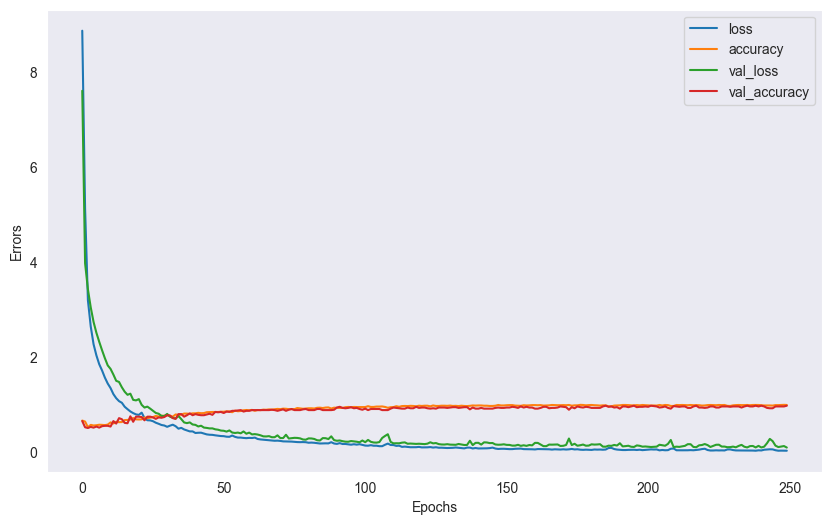

In [39]:
plt.rcParams['figure.figsize']= (10,6)
loss.plot()
plt.xlabel("Epochs")
plt.ylabel("Errors")
plt.grid()

In [40]:
ann.evaluate(xtrain, ytrain)

13/13 [==============================] - 0s 2ms/step - loss: 0.0450 - accuracy: 0.9871


[0.04496188461780548, 0.9870800971984863]